In [5]:
import multiprocessing
import datetime
from time import sleep


class Timer:
    def __init__(self, message):
        self._message = message

    def __enter__(self):
        print(f'Started: {self._message}')
        self._start = datetime.datetime.now()
        return self

    def __exit__(self, *args):
        self._end = datetime.datetime.now()
        self._interval = self._end - self._start
        message = f"Finished ({self._interval.total_seconds():.2f} seconds)"
        print(message)

---

# Non-Parallel

In [6]:
parameters1 = [1, 2, 3, 4]
parameters2 = ['a', 'b', 'c', 'd']

def score(param1, param2):
    sleep(2)
    return f"{param1}-{param2}"

results = []
with Timer("Example - Non-Parallel (for loop)"):
    for i in range(0, len(parameters1)):
        results.append(score(parameters1[i], parameters2[i]))
    
    print(results)

Started: Example - Non-Parallel (for loop)
['1-a', '2-b', '3-c', '4-d']
Finished (8.02 seconds)


---

# Parallel

In [9]:
multiprocessing.cpu_count()

8

In [7]:
from dask import delayed

@delayed
def score(param1, param2):
    sleep(2)
    return f"{param1}-{param2}"

results = []
with Timer("Example - Parallel (for loop)"):
    for i in range(0, len(parameters1)):
        results.append(score(parameters1[i], parameters2[i]))

    final = delayed(print)(results)
    final.compute()

Started: Example - Parallel (for loop)
['1-a', '2-b', '3-c', '4-d']
Finished (2.01 seconds)


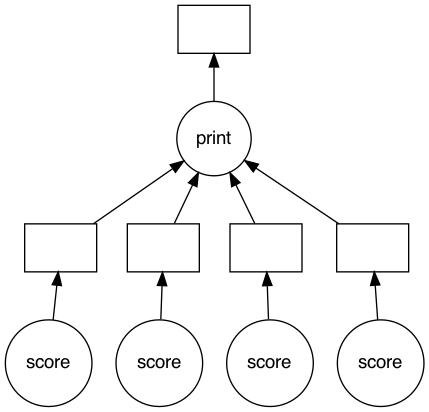

In [8]:
final.visualize()

---